In [12]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np


### 1 Load data


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

print(f"x_train.shape: {x_train.shape}")

x_train.shape: (60000, 28, 28)


### 2 Build model


In [3]:
# build model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten W x H into single feature vector
        tf.keras.layers.Dense(128, activation='relu'), # 128 node is arbitrary (learnable parameter)
        tf.keras.layers.Dropout(0.2), # drop weights with 20% chance to prevent overfitting
        tf.keras.layers.Dense(10, activation='softmax') # output layer with 10 digits (0 - 9)
    ]
)

# compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 3 Train the model


In [5]:
result = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 1s 555us/step - loss: 0.0405 - accuracy: 0.9863 - val_loss: 0.0734 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.0733 - val_accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 1s 543us/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.0725 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 1s 542us/step - loss: 0.0321 - accuracy: 0.9890 - val_loss: 0.0782 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 1s 541us/step - loss: 0.0322 - accuracy: 0.9888 - val_loss: 0.0803 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 1s 541us/step - loss: 0.0308 - accuracy: 0.9894 - val_loss: 0.0776 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 1s 539us/step - loss: 0.0298 - accuracy: 0.9896 - val_loss: 0.0821 -

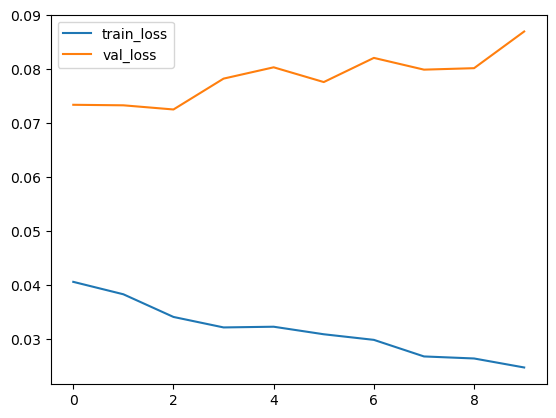

In [8]:
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


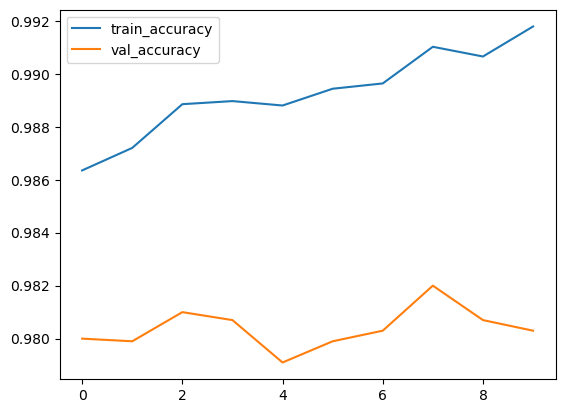

In [9]:
plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### 4 Evaluate Model Predictions


313/313 [==============================] - 0s 265us/step


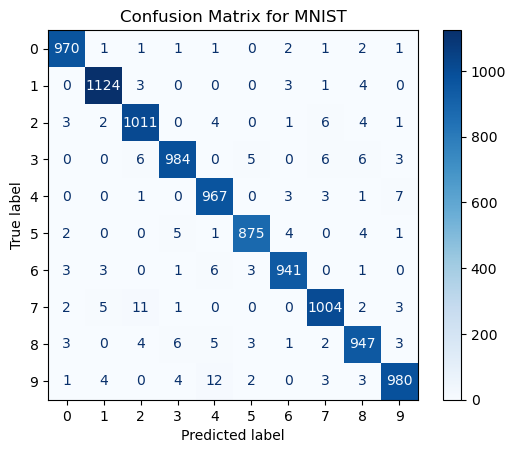

In [13]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST")
plt.show()

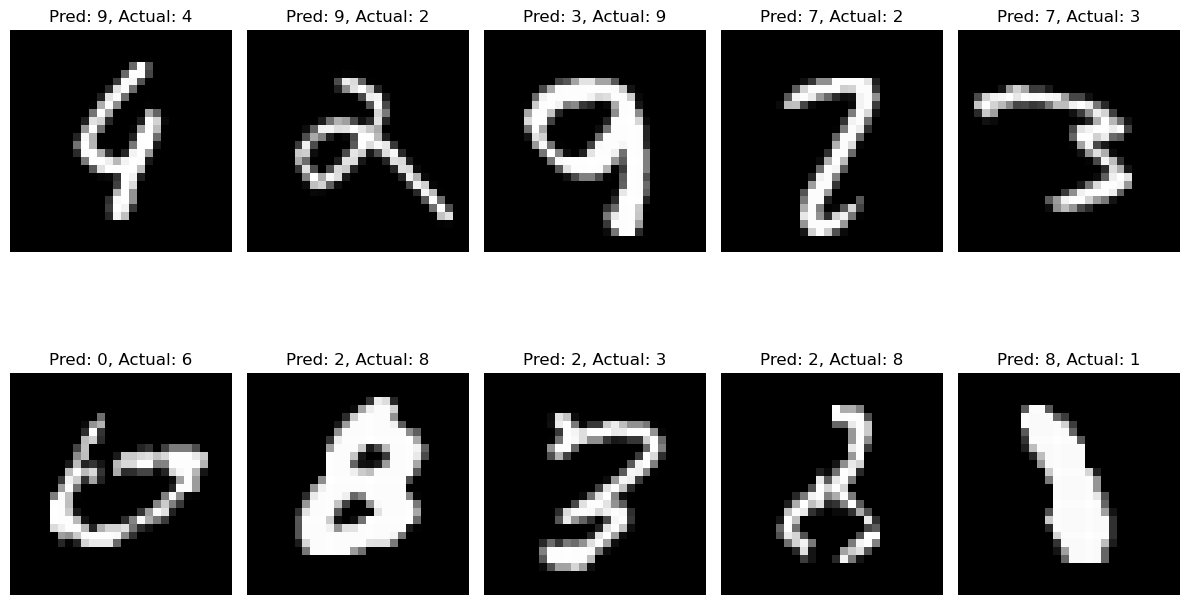

In [14]:
misclassified_idx = np.where( y_pred_labels != y_test)[0]

def plot_misclassified_images(X, y_true, y_pred, indices, num_images=10):
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[idx], cmap='gray')
        plt.title(f"Pred: {y_pred[idx]}, Actual: {y_true[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified_images(x_test, y_test, y_pred_labels, misclassified_idx)